In [1]:
import os
import tensorflow as tf
from tensorflow.keras import  models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
# Load images from directory
base_dir = "ecommerce_products"
print(os.listdir(base_dir))

['tshirt', 'jeans', 'tv', 'sofa']


In [3]:
jeans_dir = os.path.join(base_dir, 'jeans')
sofa_dir = os.path.join(base_dir, 'sofa')
tshirt_dir = os.path.join(base_dir, 'tshirt')
tv_dir = os.path.join(base_dir, 'tv')

jeans_fnames = os.listdir(jeans_dir)
sofa_fnames = os.listdir(sofa_dir)
tshirt_fnames = os.listdir(tshirt_dir)
tv_fnames = os.listdir(tv_dir)
print("count jeans :",len(jeans_fnames))
print("count sofa :",len(sofa_fnames))
print("count tshirt :",len(tshirt_fnames))
print("count tv :",len(tv_fnames))

count jeans : 199
count sofa : 199
count tshirt : 199
count tv : 199


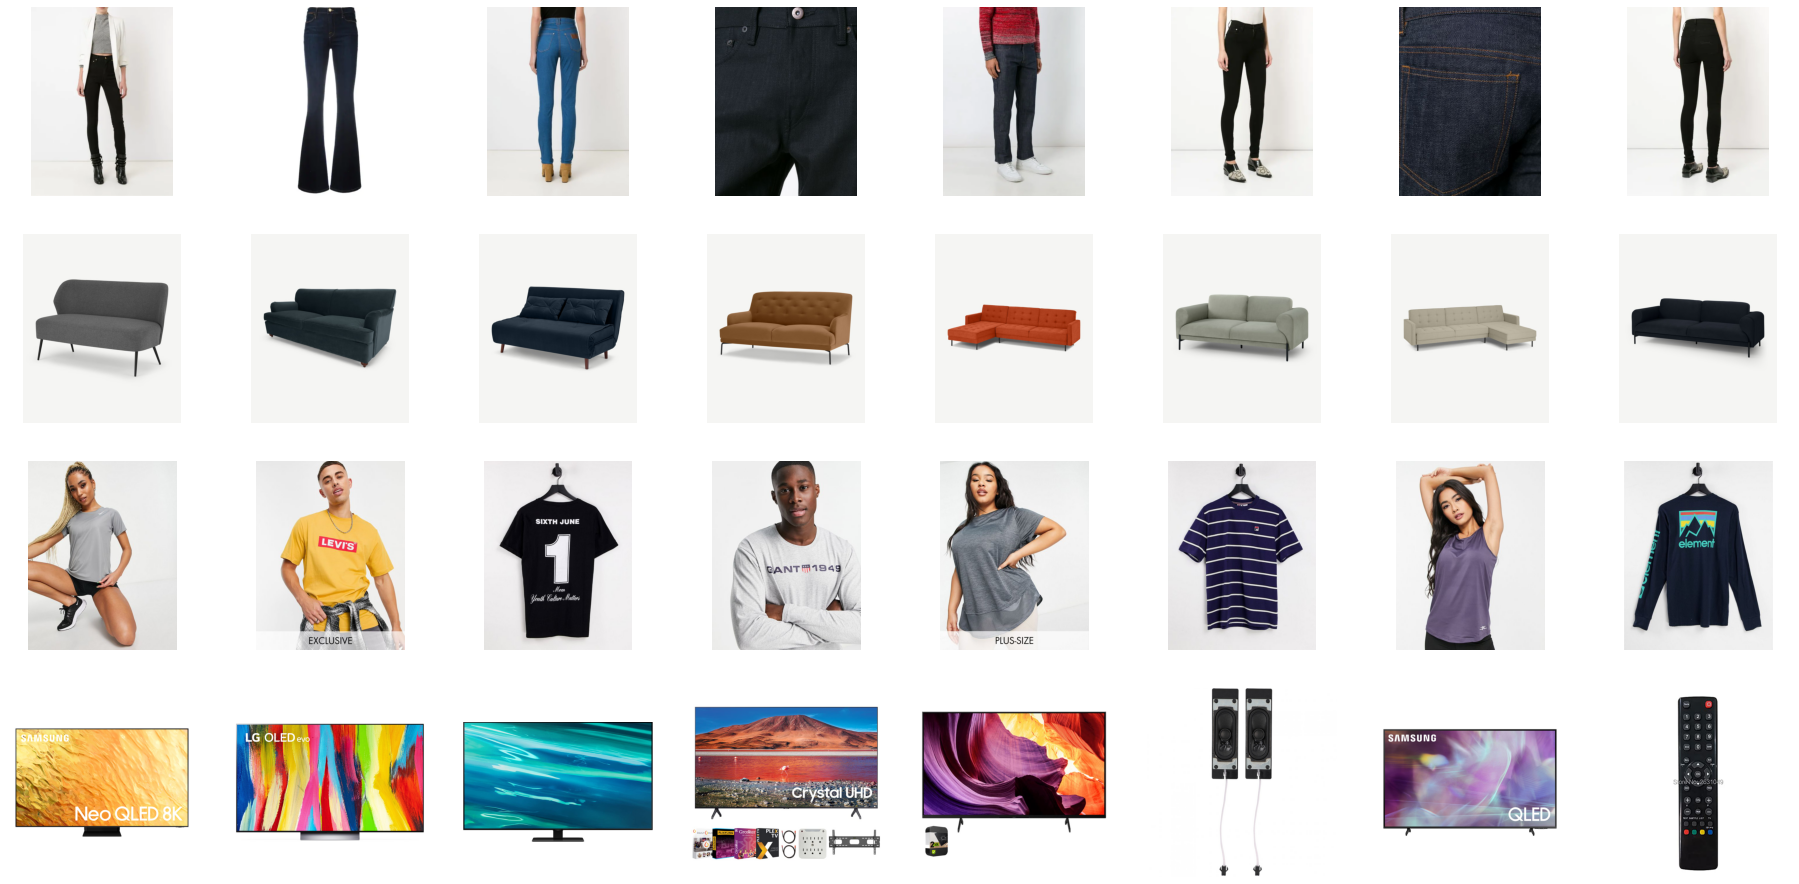

In [4]:
nrows = 4
ncols = 8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_jeans_pix = [os.path.join(jeans_dir, fname)
                for fname in jeans_fnames[ pic_index-8:pic_index]
               ]

next_sofa_pix = [os.path.join(sofa_dir, fname)
                for fname in sofa_fnames[ pic_index-8:pic_index]
               ]

next_tshirt_pix = [os.path.join(tshirt_dir, fname)
                for fname in tshirt_fnames[ pic_index-8:pic_index]
               ]

next_tv_pix = [os.path.join(tv_dir, fname)
                for fname in tv_fnames[ pic_index-8:pic_index]
               ]


for i, img_path in enumerate(next_jeans_pix+next_sofa_pix+next_tshirt_pix+next_tv_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [10]:
# Source directory containing data you want to move
source_dir = "./ecommerce_products"
destination_dir = "./cleaned_data"
os.makedirs(destination_dir, exist_ok=True)
file_list = os.listdir(source_dir)
for file_name in file_list:
    source_file = os.path.join(source_dir, file_name)

    destination_file = os.path.join(destination_dir, file_name)

    shutil.move(source_file, destination_file)
    print(f"Data has been moved from {source_file} to {destination_file}.")

Data has been moved from ./ecommerce_products/tshirt to ./cleaned_data/tshirt.
Data has been moved from ./ecommerce_products/.DS_Store to ./cleaned_data/.DS_Store.
Data has been moved from ./ecommerce_products/jeans to ./cleaned_data/jeans.
Data has been moved from ./ecommerce_products/tv to ./cleaned_data/tv.
Data has been moved from ./ecommerce_products/sofa to ./cleaned_data/sofa.


In [2]:
# Directory containing the cleaned "tvs" images
base_dir_cleaned = './cleaned_data'
# List all files in the directory
image_files = os.listdir(base_dir_cleaned)

# Count the number of image files
num_images = len(image_files)
print(f"Number of cleaned files: {num_images}")

Number of cleaned files: 5


In [3]:
tv_dir_cleaned = os.path.join(base_dir_cleaned, 'tv')
tv_fnames_cleaned = os.listdir(tv_dir_cleaned)
print("count tv :",len(tv_fnames_cleaned))

count tv : 142


Splitting Data 80% ==> training 20% ==> 10% validation, 10% test

In [6]:
img_height = 150  # Adjust as needed
img_width = 150   # Adjust as needed
batch_size = 50   # Adjust batch size as needed

# Define the data generator with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Set validation split
)

# Create data generators for training and validation
train_generator = datagen.flow_from_directory(
    base_dir_cleaned,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = datagen.flow_from_directory(
    base_dir_cleaned,  # Same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)
# Define the path to the test data directory
test_dir = "./cleaned_data"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 594 images belonging to 4 classes.
Found 145 images belonging to 4 classes.
Found 739 images belonging to 4 classes.


Image Processing

In [16]:
# Function to resize and rescale an image
def resize_and_rescale(image):
    image = tf.image.resize(image, (150, 150))
    image = image / 255.0  # Rescale pixel values to [0, 1]
    return image

In [20]:
# Create an instance of ImageDataGenerator with augmentation settings
data_augmentation = ImageDataGenerator(
    rescale=1./255,                 # Rescale pixel values to [0, 1]
    rotation_range=20,              # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,          # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,         # Randomly shift images vertically by up to 20% of the height
    horizontal_flip=True,           # Randomly flip images horizontally
    vertical_flip=True              # Randomly flip images vertically
)

In [21]:
# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = resize_and_rescale(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

Modeling

In [22]:
# Define the CNN model
model = models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [23]:
#Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [24]:
# Compile the model with an appropriate optimizer, loss function, and evaluation metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use appropriate loss function
              metrics=['accuracy'])

In [26]:
history = model.fit(
    train_generator,
    epochs=15,
    verbose=2,
    validation_data=validation_generator
)


Train for 12 steps, validate for 3 steps
Epoch 1/15
12/12 - 15s - loss: 1.2791 - accuracy: 0.4882 - val_loss: 0.7780 - val_accuracy: 0.9034
Epoch 2/15
12/12 - 14s - loss: 0.4937 - accuracy: 0.8838 - val_loss: 0.3248 - val_accuracy: 0.8966
Epoch 3/15
12/12 - 15s - loss: 0.3243 - accuracy: 0.9007 - val_loss: 0.2241 - val_accuracy: 0.9517
Epoch 4/15
12/12 - 15s - loss: 0.2626 - accuracy: 0.9125 - val_loss: 0.2097 - val_accuracy: 0.9379
Epoch 5/15
12/12 - 15s - loss: 0.2178 - accuracy: 0.9327 - val_loss: 0.1570 - val_accuracy: 0.9586
Epoch 6/15
12/12 - 14s - loss: 0.1762 - accuracy: 0.9327 - val_loss: 0.0924 - val_accuracy: 0.9724
Epoch 7/15
12/12 - 14s - loss: 0.1601 - accuracy: 0.9428 - val_loss: 0.1466 - val_accuracy: 0.9586
Epoch 8/15
12/12 - 14s - loss: 0.1696 - accuracy: 0.9478 - val_loss: 0.0741 - val_accuracy: 0.9862
Epoch 9/15
12/12 - 14s - loss: 0.1094 - accuracy: 0.9663 - val_loss: 0.0663 - val_accuracy: 0.9862
Epoch 10/15
12/12 - 14s - loss: 0.0865 - accuracy: 0.9731 - val_loss

Prediction

In [27]:
# Make predictions on the test data
predictions = model.predict(test_generator)

# Interpret the results and display the predictions
class_names = ['jeans', 'sofa', 'tshirt', 'tv']  # Replace with your class labels

# Loop through the predictions
for i, prediction in enumerate(predictions):
    predicted_class = class_names[np.argmax(prediction)]
    print(f"Image {i+1}: Predicted Category - {predicted_class}")

Image 1: Predicted Category - jeans
Image 2: Predicted Category - jeans
Image 3: Predicted Category - tshirt
Image 4: Predicted Category - tshirt
Image 5: Predicted Category - sofa
Image 6: Predicted Category - sofa
Image 7: Predicted Category - tshirt
Image 8: Predicted Category - sofa
Image 9: Predicted Category - sofa
Image 10: Predicted Category - tv
Image 11: Predicted Category - sofa
Image 12: Predicted Category - sofa
Image 13: Predicted Category - jeans
Image 14: Predicted Category - jeans
Image 15: Predicted Category - sofa
Image 16: Predicted Category - tv
Image 17: Predicted Category - jeans
Image 18: Predicted Category - sofa
Image 19: Predicted Category - tv
Image 20: Predicted Category - tv
Image 21: Predicted Category - tv
Image 22: Predicted Category - tshirt
Image 23: Predicted Category - tshirt
Image 24: Predicted Category - tshirt
Image 25: Predicted Category - tshirt
Image 26: Predicted Category - jeans
Image 27: Predicted Category - sofa
Image 28: Predicted Categor

In [30]:
# save the model
model.save('ric_model.h5', save_format='h5')

In [19]:
loaded_model = load_model("ric_model.h5")